In [65]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np



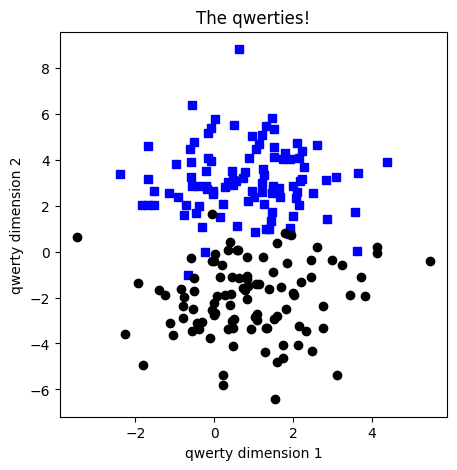

In [66]:
# create data

nPerClust = 100
blur = 1.5

A = [  1,  3 ]
B = [  1, -2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [67]:
def createANNmodel(learningRate):

  # model architecture
  ANNclassify = nn.Sequential(
      nn.Linear(2,16),  # input layer
      nn.ReLU(),        # activation unit
      nn.Linear(16,1),  # hidden layer
      nn.ReLU(),        # activation unit
      nn.Linear(1,1),   # output unit
      nn.Sigmoid(),     # final activation unit
        )

  # loss function
  lossfun = nn.BCELoss() # but better to use BCEWithLogitsLoss

  # optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

  # model output
  return ANNclassify,lossfun,optimizer

In [68]:
import torch.nn.functional as F

class ANNChallenge(nn.Module):
    def __init__(self):
        super().__init__()
        self.inputs = nn.Linear(2,16)
        self.hidden1 = nn.Linear(16,1)
        self.outputs = nn.Linear(1,1)
        
    def forward(self, X):
        X = self.inputs(X)
        X = F.relu(X)
        
        X = self.hidden1(X)
        X = F.relu(X)
        
        X = self.outputs(X)
        
        return F.sigmoid(X)
    

        

In [69]:
net = ANNChallenge()

optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
lossfun = nn.BCELoss()

for epoch in range(500):
    y_pred = net(data)
    
    loss = lossfun(y_pred, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    acc = 100*torch.mean(((y_pred>.5) == labels).float())
    
acc    

tensor(97.)